In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
datos = pd.read_csv(filepath_or_buffer = "/users/angel/Downloads/samsung.csv")
datos.head()

,Date,Close,Volume
0,02/01/2008,10880,18047200
1,03/01/2008,10920,19346500
2,04/01/2008,10780,17997350
3,07/01/2008,10380,39787200
4,08/01/2008,10320,24783700


In [6]:
X = datos[['Close', 'Volume']]

In [7]:
X = X.dropna()

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

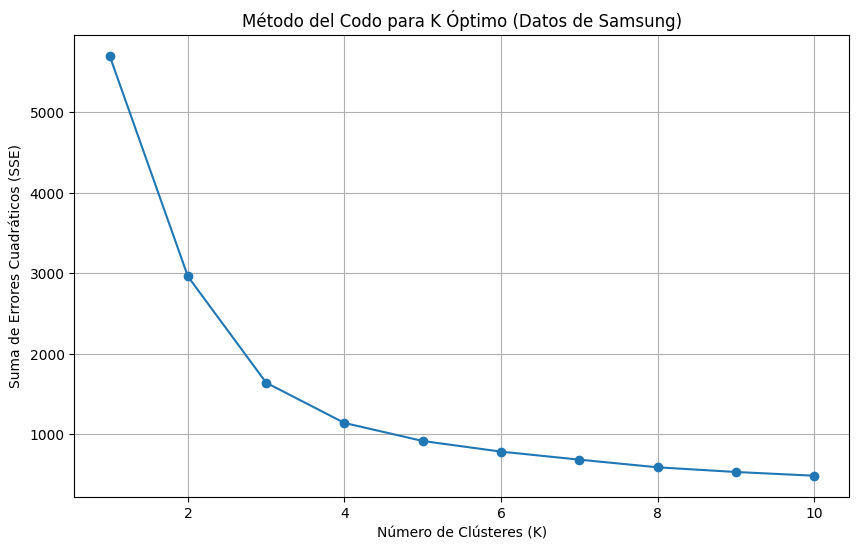

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Método del Codo para K Óptimo (Datos de Samsung)')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Suma de Errores Cuadráticos (SSE)')
plt.grid(True)
plt.savefig('elbow_plot.png')
plt.show()

In [11]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

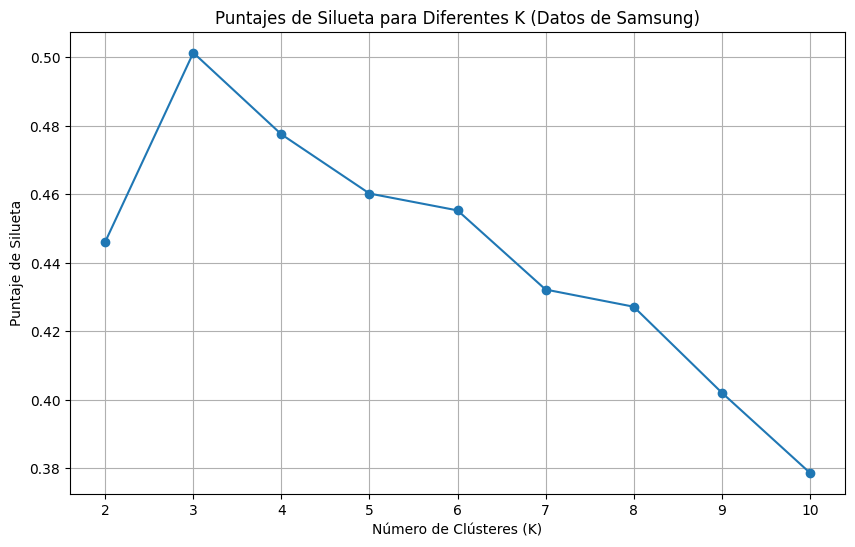

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Puntajes de Silueta para Diferentes K (Datos de Samsung)')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Puntaje de Silueta')
plt.grid(True)
plt.savefig('silhouette_plot.png')
plt.show()